In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
airtel = pd.read_csv('./data/Airtel_stadre.csv')
airtel.head()

,Test point,Assigned cluster,RMSE,MAPE,R2-score,WD origin,Wasserstein distance,WD ratio,mse,staDRE
0,381,3,14.360479,2.257284,0.199910,508.232692,33.887371,0.066677,0.1219,0.905712
1,349,3,6.646066,0.955022,0.264143,508.232692,18.922778,0.037233,0.1219,0.920434
2,366,3,9.938393,1.519216,-0.343449,508.232692,18.815002,0.037020,0.1219,0.920540
3,515,3,111.613202,15.055409,-44.101618,508.232692,113.006051,0.222351,0.1219,0.827874
4,536,3,70.955766,10.117774,-20.351810,508.232692,107.862747,0.212231,0.1219,0.832934


In [3]:
google = pd.read_csv('./data/Google_stadre.csv')
google.head()

,Test point,Assigned cluster,RMSE,MAPE,R2-score,WD origin,Wasserstein distance,WD ratio,mse,staDRE
0,418,2,135.042738,8.035833,-4.075193,1009.653857,404.644568,0.400776,0.0556,0.771812
1,413,2,140.194264,8.516297,-5.164708,1009.653857,400.730027,0.396898,0.0556,0.773751
2,510,2,298.348724,16.138417,-17.996479,1009.653857,494.301885,0.489576,0.0556,0.727412
3,582,2,662.061836,29.103729,-26.162855,1009.653857,559.893577,0.554540,0.0556,0.694930
4,175,2,29.738688,1.810659,-0.246442,1009.653857,179.362181,0.177647,0.0556,0.883376


In [4]:
jpm = pd.read_csv('./data/JPM_stadre.csv')
jpm.head()

,Test point,Assigned cluster,RMSE,MAPE,R2-score,WD origin,Wasserstein distance,WD ratio,mse,staDRE
0,421,2,2.394076,1.538328,-0.573088,106.673116,27.479428,0.257604,0.0778,0.832298
1,35,2,2.271938,1.801900,0.544335,106.673116,1.087778,0.010197,0.0778,0.956001
2,252,2,2.429642,1.961133,-0.633177,106.673116,5.003207,0.046902,0.0778,0.937649
3,707,2,8.991106,5.673514,-11.116920,106.673116,37.265970,0.349347,0.0778,0.786426
4,284,2,1.647422,1.129783,0.469524,106.673116,5.571185,0.052227,0.0778,0.934987


In [5]:
mrf = pd.read_csv('./data/MRF_stadre.csv')
mrf.head()

,Test point,Assigned cluster,RMSE,MAPE,R2-score,WD origin,Wasserstein distance,WD ratio,mse,staDRE
0,580,2,6263.202056,6.368051,-5.290872,70230.246371,13589.633757,0.193501,0.1373,0.834599
1,731,2,3514.223385,3.096213,-0.731989,70230.246371,8298.743913,0.118165,0.1373,0.872268
2,671,2,2095.575458,2.263159,-4.183759,70230.246371,9050.532976,0.128869,0.1373,0.866915
3,287,2,1144.084514,1.624389,0.529888,70230.246371,6170.513167,0.087861,0.1373,0.887419
4,482,4,1457.799369,2.145389,-0.354405,52513.943856,6743.206833,0.128408,0.1218,0.874896


In [6]:
reliance = pd.read_csv('./data/Reliance_stadre.csv')
reliance.head()

,Test point,Assigned cluster,RMSE,MAPE,R-Squared,WD origin,Wasserstein distance,WD ratio,mse,staDRE
0,213,2,53.066128,3.212771,0.834247,1430.619949,102.896968,0.071925,0.3188,0.804638
1,413,2,136.688100,6.286176,-2.537312,1430.619949,412.235154,0.288151,0.3188,0.696524
2,279,2,186.379726,8.501302,-3.006229,1430.619949,457.004740,0.319445,0.3188,0.680877
3,452,2,124.105259,6.059450,-4.516971,1430.619949,417.973869,0.292163,0.3188,0.694519
4,167,2,32.222109,1.792288,0.207750,1430.619949,18.996452,0.013278,0.3188,0.833961


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
degree = 2

In [9]:
xa = np.array(airtel['staDRE'].values)
# ya = np.array(airtel['RMSE'].values)
# ya = np.array(airtel['MAPE'].values)
ya = np.array(airtel['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xa = scaler.fit_transform(xa.reshape(-1, 1))
ya = scaler.fit_transform(ya.reshape(-1, 1))

xa = xa.flatten()
ya = ya.flatten()

#end

za = np.polyfit(xa, ya, degree)

fit_airtel = np.poly1d(za)

xa_min = xa.min()
xa_max = xa.max()

xpa = np.linspace(xa_min, xa_max, 100)
ypa = fit_airtel(xpa)

In [10]:
xg = np.array(google['staDRE'].values)
# yg = np.array(google['RMSE'].values)
# yg = np.array(google['MAPE'].values)
yg = np.array(google['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xg = scaler.fit_transform(xg.reshape(-1, 1))
yg = scaler.fit_transform(yg.reshape(-1, 1))

xg = xg.flatten()
yg = yg.flatten()

#end

zg = np.polyfit(xg, yg, degree)

fit_google = np.poly1d(zg)

xg_min = xg.min()
xg_max = xg.max()

xpg = np.linspace(xg_min, xg_max, 100)
ypg = fit_google(xpg)

In [11]:
xj = np.array(jpm['staDRE'].values)
# yj = np.array(jpm['RMSE'].values)
# yj = np.array(jpm['MAPE'].values)
yj = np.array(jpm['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xj = scaler.fit_transform(xj.reshape(-1, 1))
yj = scaler.fit_transform(yj.reshape(-1, 1))

xj = xj.flatten()
yj = yj.flatten()

#end

zj = np.polyfit(xj, yj, degree)

fit_jpm = np.poly1d(zj)

xj_min = xj.min()
xj_max = xj.max()

xpj = np.linspace(xj_min, xj_max, 100)
ypj = fit_jpm(xpj)

In [12]:
xm = np.array(mrf['staDRE'].values)
# ym = np.array(mrf['RMSE'].values)
# ym = np.array(mrf['MAPE'].values)
ym = np.array(mrf['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xm = scaler.fit_transform(xm.reshape(-1, 1))
ym = scaler.fit_transform(ym.reshape(-1, 1))

xm = xm.flatten()
ym = ym.flatten()

#end

zm = np.polyfit(xm, ym, degree)

fit_mrf = np.poly1d(zm)

xm_min = xm.min()
xm_max = xm.max()

xpm = np.linspace(xm_min, xm_max, 100)
ypm = fit_mrf(xpm)

In [13]:
xr = np.array(reliance['staDRE'].values)
# yr = np.array(reliance['RMSE'].values)
# yr = np.array(reliance['MAPE'].values)
yr = np.array(reliance['R-Squared'].values)

# when normalized use these lines, else comment this part of the code
xr = scaler.fit_transform(xr.reshape(-1, 1))
yr = scaler.fit_transform(yr.reshape(-1, 1))

xr = xr.flatten()
yr = yr.flatten()

#end

zr = np.polyfit(xr, yr, degree)

fit_reliance = np.poly1d(zr)

xr_min = xr.min()
xr_max = xr.max()

xpr = np.linspace(xr_min, xr_max, 100)
ypr = fit_reliance(xpr)

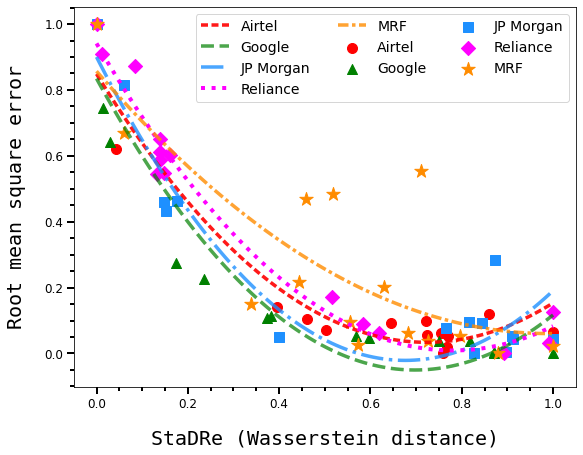

In [14]:
#Plotting RMSE-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', dashes=[2, 1], linewidth=3.5, alpha = 0.9, label = 'Airtel')
ax1.scatter(xa, ya, 100, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=3.5, alpha = 0.7, label = 'Google')
ax1.scatter(xg, yg, 100, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashdot', linewidth=3.5, alpha = 0.8, label = 'JP Morgan')
ax1.scatter(xj, yj, 100, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dotted', linewidth=4, alpha = 1, label = 'Reliance')
ax1.scatter(xr, yr, 100, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle=(0, (3, 1, 1, 1)), linewidth=3.5, alpha = 0.8, label = 'MRF')
ax1.scatter(xm, ym, 200, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('StaDRe (Wasserstein distance)', fontsize=20, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('Root mean square error', fontsize=20, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
plt.minorticks_on()
ax1.legend(loc='best', ncol=3, fontsize=14)

plt.savefig('./Pictures/RMSE_vs._stadre_2.png', dpi=300)
plt.show()



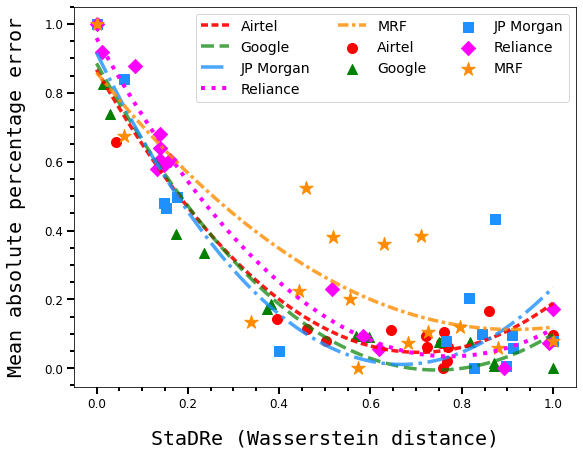

In [20]:
#Plotting MAPE-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', dashes=[2, 1], linewidth=3.5, alpha = 0.9, label = 'Airtel')
ax1.scatter(xa, ya, 100, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=3.5, alpha = 0.7, label = 'Google')
ax1.scatter(xg, yg, 100, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashdot', linewidth=3.5, alpha = 0.8, label = 'JP Morgan')
ax1.scatter(xj, yj, 100, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dotted', linewidth=4, alpha = 1, label = 'Reliance')
ax1.scatter(xr, yr, 100, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle=(0, (3, 1, 1, 1)), linewidth=3.5, alpha = 0.8, label = 'MRF')
ax1.scatter(xm, ym, 200, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('StaDRe (Wasserstein distance)', fontsize=20, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('Mean absolute percentage error', fontsize=20, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
plt.minorticks_on()
ax1.legend(loc='best', ncol=3, fontsize=14)

plt.savefig('./Pictures/MAPE_vs._stadre_2.png', dpi=300)
plt.show()



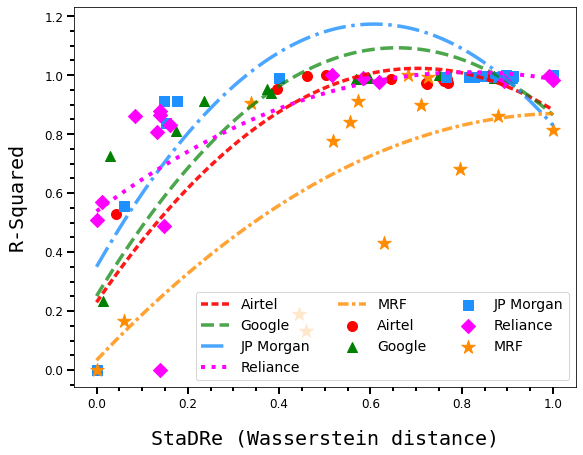

In [14]:
#Plotting R2score-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', dashes=[2, 1], linewidth=3.5, alpha = 0.9, label = 'Airtel')
ax1.scatter(xa, ya, 100, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=3.5, alpha = 0.7, label = 'Google')
ax1.scatter(xg, yg, 100, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashdot', linewidth=3.5, alpha = 0.8, label = 'JP Morgan')
ax1.scatter(xj, yj, 100, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dotted', linewidth=4, alpha = 1, label = 'Reliance')
ax1.scatter(xr, yr, 100, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle=(0, (3, 1, 1, 1)), linewidth=3.5, alpha = 0.8, label = 'MRF')
ax1.scatter(xm, ym, 200, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('StaDRe (Wasserstein distance)', fontsize=20, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('R-Squared', fontsize=20, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
plt.minorticks_on()
ax1.legend(loc='best', ncol=3, fontsize=14)

plt.savefig('./Pictures/R2_vs._stadre_2.png', dpi=300)
plt.show()

